<a href="https://colab.research.google.com/github/Kajalkumbhare01/CODSOFT/blob/main/TASK_3_CODSOFT_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 3 - IRIS FLOWER CLASSIFICATION**!

> **Author - Kajal Kumbhare**

> **Batch  - May 2024**

> **Domain - Data Science**

> **Aim    - To create a model that accurately identifies Iris flower species using their sepal and petal measurements through data science techniques.**


**Github Link**:

### **PROJECT INTRODUCTION**

This project is about using data science to identify different types of Iris flowers. The Iris flower dataset is a famous dataset that includes measurements of flowers' petals and sepals. Each flower is one of three species: Iris setosa, Iris versicolor, or Iris virginica.

Our goal is to create a model that can look at these measurements and correctly tell which species a flower belongs to. We'll use this project to learn how to handle data, explore it, and apply machine learning techniques to make predictions.

By the end of the project, we will have a working model that can accurately classify Iris flowers based on their measurements, demonstrating how data science can be used to solve classification problems.

### **PROBLEM STATEMENT**

The objective of this project is to develop a machine learning model capable of accurately classifying Iris flowers into one of three species—Setosa, Versicolor, or Virginica—based on their sepal and petal measurements. Given the features of sepal length, sepal width, petal length, and petal width, the model should predict the species of the Iris flower. This classification problem serves as an exercise in applying data science techniques to a well-known dataset, providing insights into the processes of data preprocessing, model training, and evaluation to achieve high prediction accuracy.

**INPUT**

* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

**OUTPUT**

* Class of Flower

# **Let's Dive in!**

###### **Import Libraries**

In [ ]:
# Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **DATA COLLECTION**

##### **Dataset Loading**

In [ ]:
# Load the data
data= pd.read_csv("IRIS.csv")

In [ ]:
# dataset first view
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
nan_indices = np.argwhere(np.isnan(0))

print(nan_indices)

[]


In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# head: It is used to print 5 first rows
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# tail: It is used to print last 5 rows
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# dtypes: It is used to find data type of each column
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
# describe: It is used to give the statistical report of each column
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### **Dataset Rows and Columns**

In [ ]:
# Number of Rows and Columns
data.shape
print(f'Number of Rows: {len(data.axes[0])}')
print(f'Number of Columns: {len(data.axes[1])}')

Number of Rows: 150
Number of Columns: 5


##### **Dataset Information**

In [ ]:
# Getting some information from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### **Univariate Analysis**

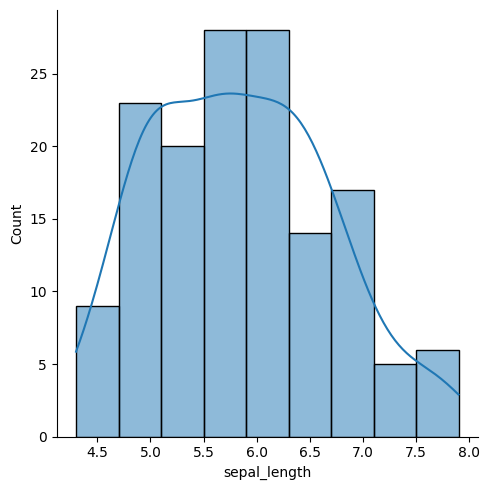

In [ ]:
# Univariate Analysis
# Check the distribution of Target column
sns.displot(x=data.sepal_length, kde=True)
plt.show()

In [ ]:
data.sepal_length.skew()      # data is normal

0.3149109566369728

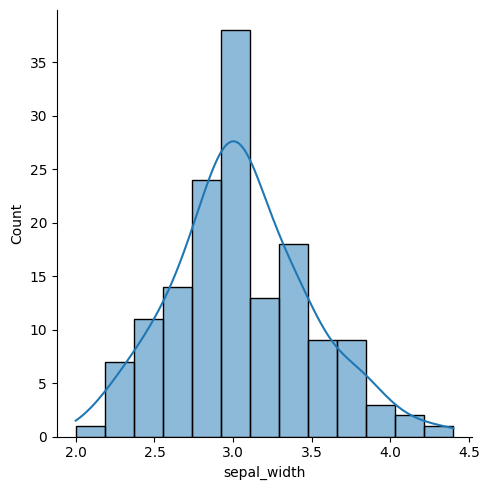

In [ ]:
# Univariate Analysis
# Check the distribution of Target column
sns.displot(x=data.sepal_width, kde=True)
plt.show()

In [ ]:
data.sepal_width.skew()          # data is normal

0.3340526621720866

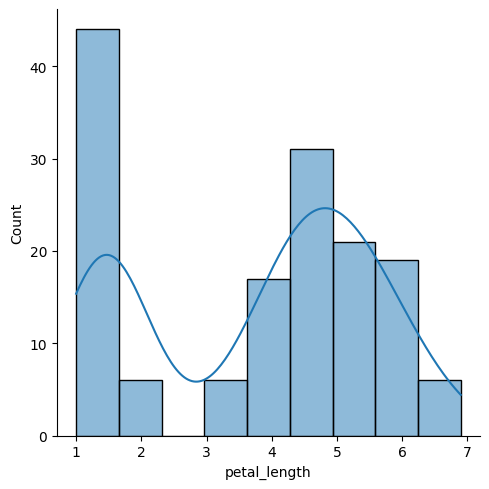

In [ ]:
# Univariate Analysis
# Check the distribution of Target column
sns.displot(x=data.petal_length, kde=True)
plt.show()

In [ ]:
data.petal_length.skew()          # data is not normal

-0.27446425247378287

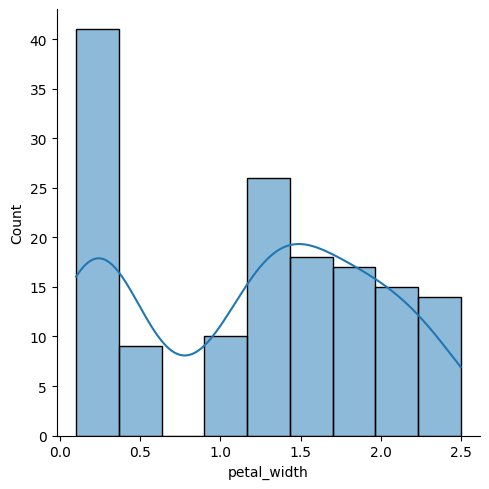

In [ ]:
# Univariate Analysis
# Check the distribution of Target column
sns.displot(x=data.petal_width, kde=True)
plt.show()

In [ ]:
data.petal_width.skew()

-0.10499656214412734

### **DATA PREPROCESSING**

##### **Duplicate Values**

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Create a DataFrame
data = pd.DataFrame(data, columns=iris.feature_names)
data['species'] = target

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# after dropping duplicate values
data.duplicated().sum()

0

In [ ]:
# check the number of missing values in each column
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

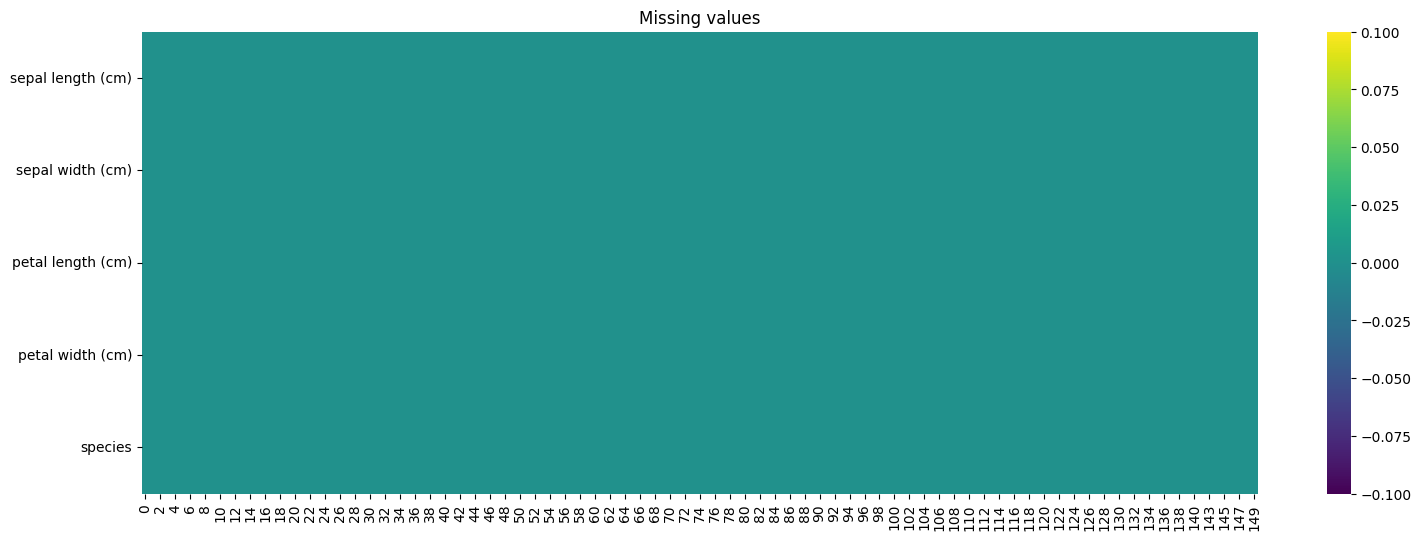

In [ ]:
# visualization the data using Heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(data.isna().transpose(),
            cmap='viridis')
plt.title('Missing values')
plt.show()

In [ ]:
print(data.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


##### **Outliers**

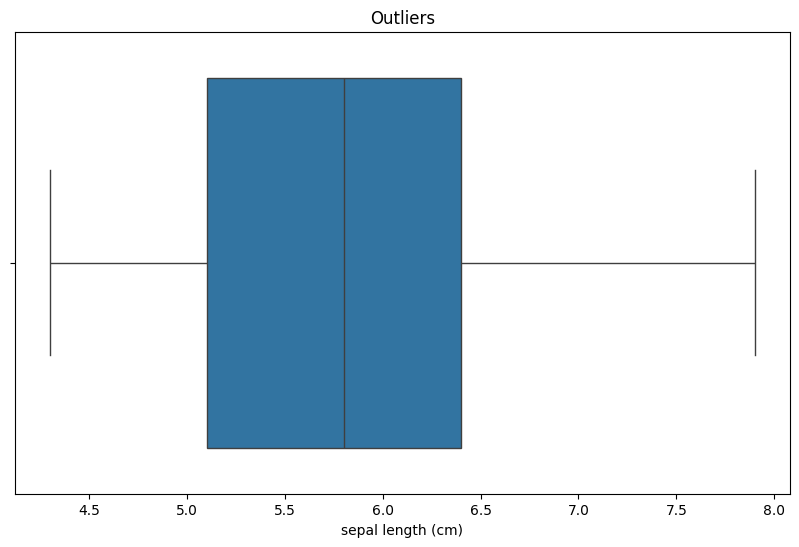

In [ ]:
# visualization outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sepal length (cm)'])
plt.title('Outliers')
plt.show()

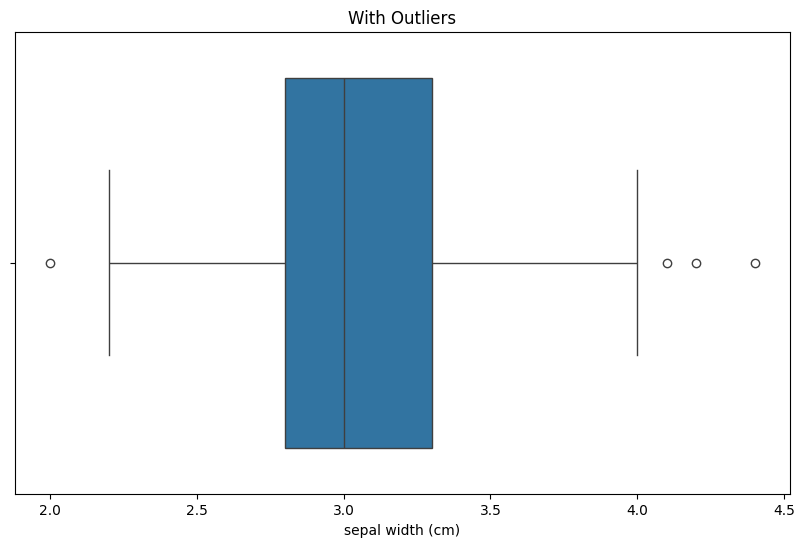

In [ ]:
# visualization outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sepal width (cm)'])
plt.title('With Outliers')
plt.show()

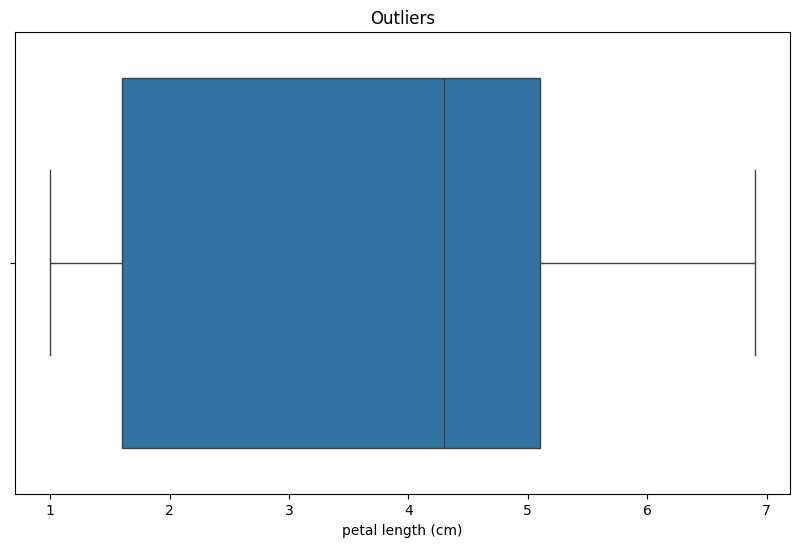

In [ ]:
# visualization outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['petal length (cm)'])
plt.title('Outliers')
plt.show()

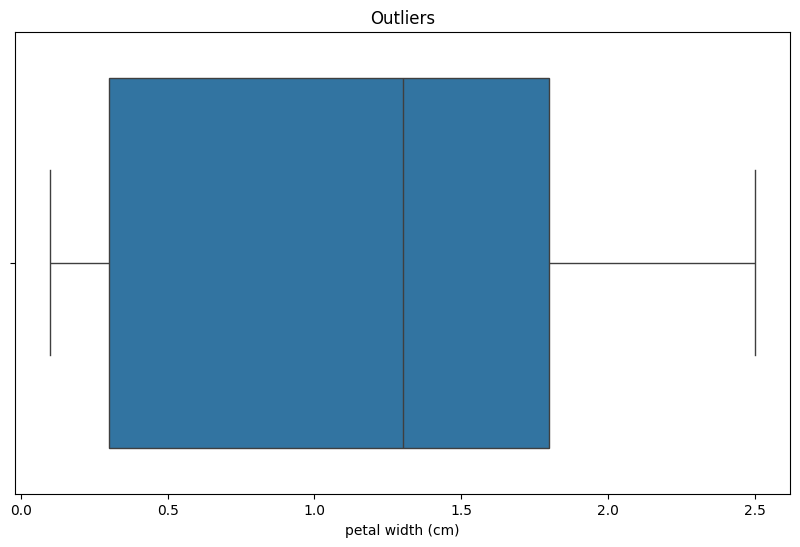

In [ ]:
# visualization outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['petal width (cm)'])
plt.title('Outliers')
plt.show()

##### **Handling Outliers**

In [ ]:
# handling outliers using IQR method
Q1 = data['sepal width (cm)'].quantile(0.25)
Q3 = data['sepal width (cm)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((data['sepal width (cm)'] < lower_bound)) | ((data['sepal width (cm)'] > upper_bound))

In [ ]:
data = data.mask(outliers)

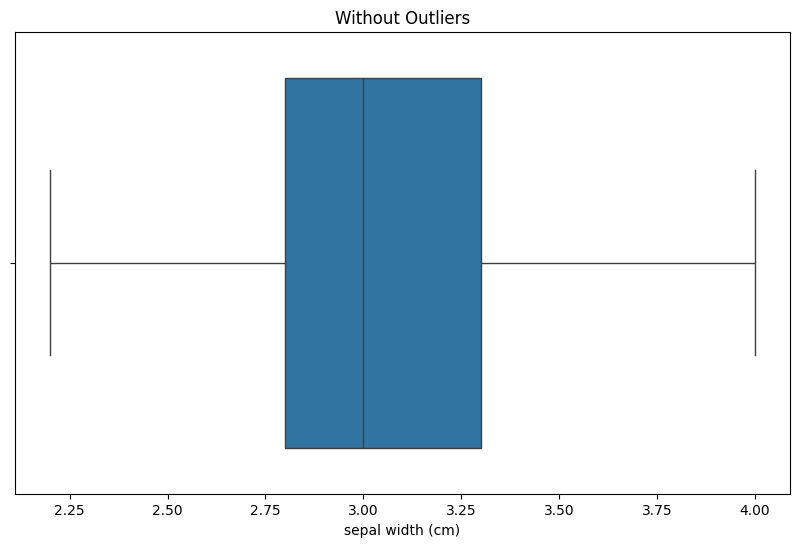

In [ ]:
# visualization outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sepal width (cm)'])
plt.title('Without Outliers')
plt.show()

In [ ]:
# dataset column
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

### **Visualization of the Dataset**

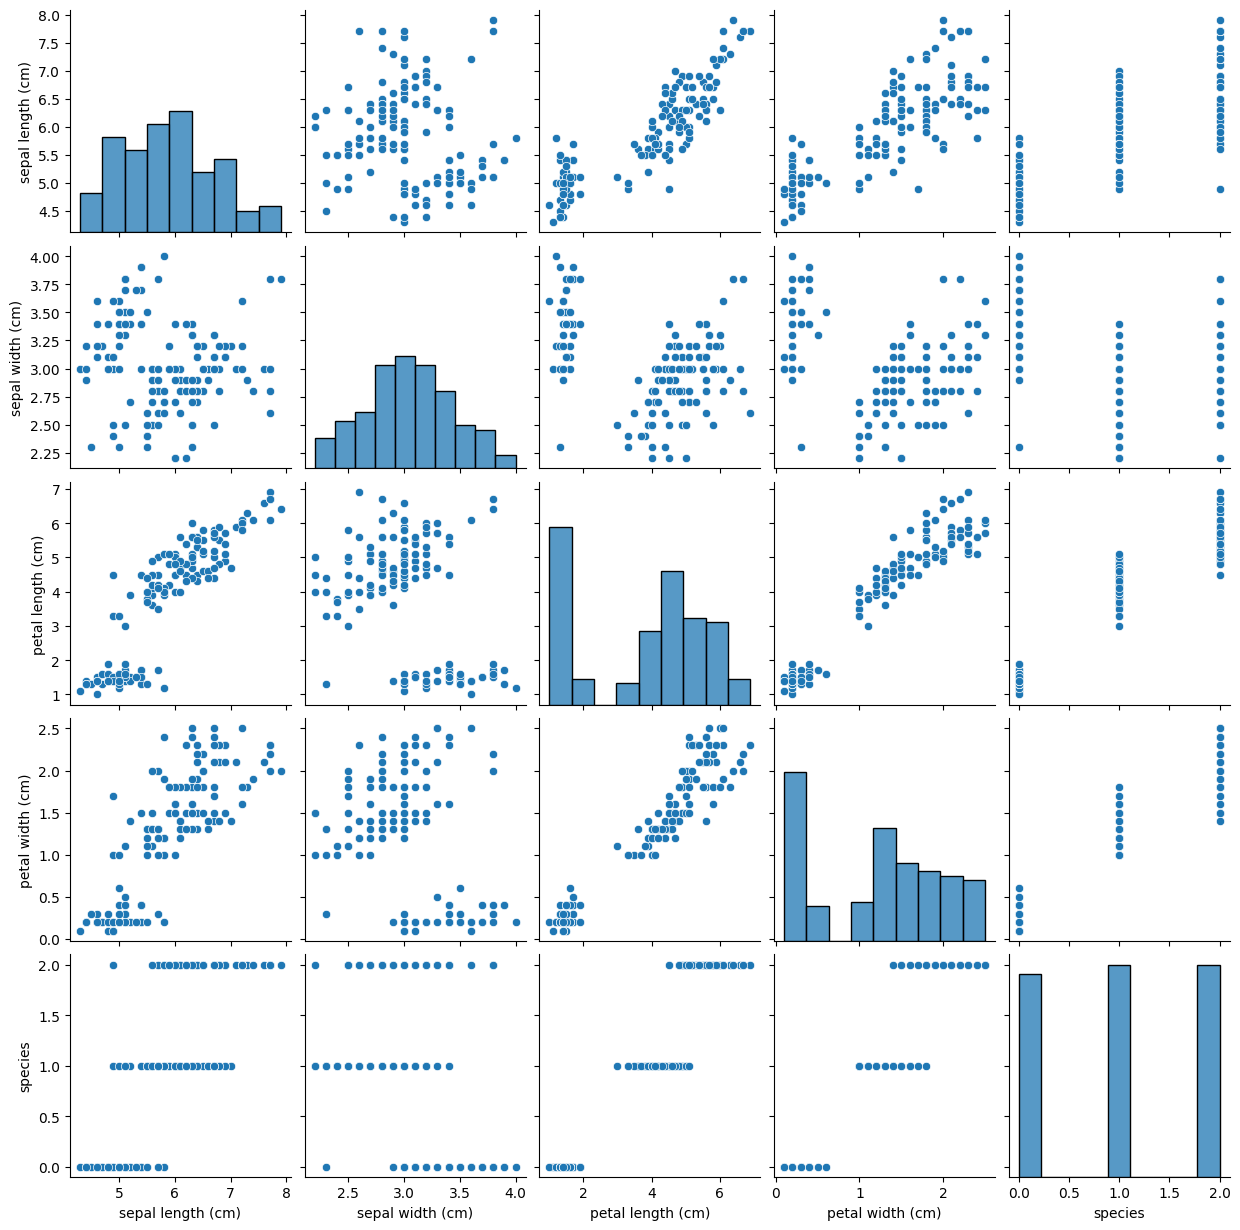

In [ ]:
sns.pairplot(data)

### **Feature Engineering**

In [ ]:
# separate features and target
data = data.values
x = data[:, 0:4]
y = data[:, 4]

In [ ]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [nan nan nan nan]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [nan nan nan nan]
 [nan nan nan nan]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. nan nan  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.]


### **Splitting Data into Training and Testing**

In [ ]:
# split the data to train and test dataset.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train)

[[6.3 2.8 5.1 1.5]
 [7.4 2.8 6.1 1.9]
 [5.  3.5 1.3 0.3]
 [6.9 3.2 5.7 2.3]
 [5.4 3.7 1.5 0.2]
 [5.1 3.3 1.7 0.5]
 [5.4 3.9 1.7 0.4]
 [6.7 3.3 5.7 2.1]
 [5.8 4.  1.2 0.2]
 [6.1 2.9 4.7 1.4]
 [5.  3.  1.6 0.2]
 [5.7 3.  4.2 1.2]
 [5.8 2.8 5.1 2.4]
 [nan nan nan nan]
 [4.9 2.5 4.5 1.7]
 [7.7 2.8 6.7 2. ]
 [5.3 3.7 1.5 0.2]
 [4.9 2.4 3.3 1. ]
 [6.1 3.  4.9 1.8]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 4.9 1.5]
 [6.4 3.2 5.3 2.3]
 [4.8 3.1 1.6 0.2]
 [7.2 3.6 6.1 2.5]
 [4.3 3.  1.1 0.1]
 [nan nan nan nan]
 [5.4 3.4 1.5 0.4]
 [6.7 3.  5.2 2.3]
 [5.9 3.  5.1 1.8]
 [5.7 2.8 4.1 1.3]
 [6.  2.2 5.  1.5]
 [6.9 3.1 5.1 2.3]
 [nan nan nan nan]
 [4.6 3.2 1.4 0.2]
 [5.9 3.  4.2 1.5]
 [6.6 2.9 4.6 1.3]
 [5.7 3.8 1.7 0.3]
 [6.1 3.  4.6 1.4]
 [5.7 2.9 4.2 1.3]
 [5.7 2.8 4.5 1.3]
 [6.1 2.8 4.7 1.2]
 [6.7 3.3 5.7 2.5]
 [7.6 3.  6.6 2.1]
 [6.3 3.4 5.6 2.4]
 [5.6 2.5 3.9 1.1]
 [5.4 3.9 1.3 0.4]
 [6.8 2.8 4.8 1.4]
 [6.4 3.1 5.5 1.8]
 [6.5 3.  5.8 2.2]
 [6.4 3.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [5.1 3.7 1.5 0.4]
 [4.5 2.3 1.

In [ ]:
print(y_train)

[ 2.  2.  0.  2.  0.  0.  0.  2.  0.  1.  0.  1.  2. nan  2.  2.  0.  1.
  2.  0.  1.  2.  0.  2.  0. nan  0.  2.  2.  1.  2.  2. nan  0.  1.  1.
  0.  1.  1.  1.  1.  2.  2.  2.  1.  0.  1.  2.  2.  1.  1.  0.  0.  2.
  1.  0.  1.  1.  2.  0.  1.  0.  1.  0.  2.  1.  0.  0.  2.  0.  1.  1.
  2.  1.  2.  1.  0.  0.  0.  0.  2.  2.  2. nan  1.  0.  1.  1.  1.  0.
  1.  2.  0.  1.  0.  0.  2.  2.  1.  0.  1.  2.  1.  0.  0.  2.  1.  2.
  1.  0.  1.  1.  1.  1.  2.  2.  2.  0.  0.]


In [ ]:
print(x_test)

[[7.7 3.  6.1 2.3]
 [5.5 2.5 4.  1.3]
 [7.3 2.9 6.3 1.8]
 [6.6 3.  4.4 1.4]
 [6.5 2.8 4.6 1.5]
 [7.2 3.  5.8 1.6]
 [6.8 3.2 5.9 2.3]
 [5.1 3.5 1.4 0.2]
 [6.5 3.  5.2 2. ]
 [6.3 3.3 4.7 1.6]
 [4.4 3.  1.3 0.2]
 [5.4 3.4 1.7 0.2]
 [4.8 3.  1.4 0.3]
 [5.6 2.9 3.6 1.3]
 [4.8 3.4 1.6 0.2]
 [5.1 3.8 1.5 0.3]
 [5.  3.3 1.4 0.2]
 [6.4 2.8 5.6 2.2]
 [5.  3.4 1.6 0.4]
 [4.6 3.6 1.  0.2]
 [6.7 2.5 5.8 1.8]
 [6.  2.7 5.1 1.6]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.  2.2 4.  1. ]
 [6.5 3.  5.5 1.8]
 [5.2 2.7 3.9 1.4]
 [7.7 3.8 6.7 2.2]
 [5.5 2.4 3.8 1.1]
 [7.7 2.6 6.9 2.3]]


In [ ]:
print(y_test)

[2. 1. 2. 1. 1. 2. 2. 0. 2. 1. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 2. 1. 2. 2.
 1. 2. 1. 2. 1. 2.]
